## Conjugate synthesis with phase correction  
###### Author: Zimu Huo
###### Date: 05.2022

Mainly based on John Pauly's diagram. 

-------------------------------------------------------------------------
References
    
    [1] 
    Author: G McGibney et al.
    Title: Quantitative evaluation of several partial Fourier reconstruction algorithms used in MRI
    Link: https://pubmed.ncbi.nlm.nih.gov/8371675/
    
   

In [4]:
import sys
sys.path.insert(1, '../')
import matplotlib.pyplot as plt
import util.coil as coil
from util.fft import *
import numpy as np
import util.mask as undersample
import util.simulator as simulate
import util.io as io
from util.zpad import *
from tqdm.notebook import tqdm
from util.partialFourier import *

In [5]:
filepath = '../lib/meas_MID308_low_res_2dflash_FID17297.dat'
data = io.getCoilData(filepath)  
[ny,nx,nc] = data.shape

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/33.6M [00:00<?, ?B/s]

read data:   0%|          | 0/256 [00:00<?, ?it/s]

In [12]:
dataR = data * undersample.partialFourier(data.shape, 0.7)
calib = simulate.acs(dataR,(64, 256))
calib = zpad3(calib)

patch taken from 96 : 160 in y
patch taken from 0 : 256 in x


In [13]:
recon = np.zeros(dataR.shape, dtype = complex)
for c in tqdm(range(nc)):
    recon[...,c] = conjugateSynthesis(dataR[...,c], calib[...,c])

  0%|          | 0/32 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Recon image')

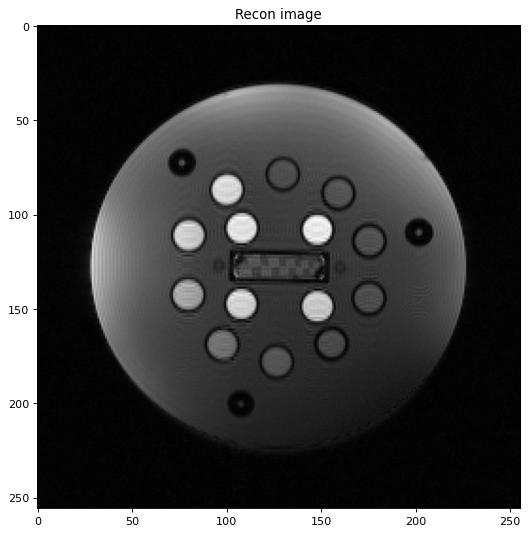

In [14]:
plt.figure(figsize=(12, 8), dpi=80)
plt.imshow(np.abs(rsos(recon)),cmap = 'gray')
plt.title("Recon image")